### Here we will apply some simulations:
- fake users
- user likes
- user logs

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

### Fake users

In [95]:
df_fake_users = pd.read_csv('../data/fake_users.csv')
df_fake_users = df_fake_users[['user_id', 'username', 'gender']]

In [96]:
df_fake_users.iloc[0] = [0, 'koray', 'male']
df_fake_users.iloc[1] = [1, 'maryam', 'female']

In [98]:
df_fake_users.to_csv('../data/fake_users.csv', index=False)

In [99]:
pd.read_csv('../data/fake_users.csv').head(10)

,user_id,username,gender
0,0,koray,male
1,1,maryam,female
2,2,Roolearm,female
3,3,Alich1952,female
4,4,Evisold,male
5,5,Amor2010,female
6,6,Gert1963,female
7,7,Frorcut,female
8,8,Ablee2016,male
9,9,Notiontery71,female


#### User likes

In [103]:
df_tv_programs = pd.read_csv('../data/tv_programs_and_episodes.csv')

In [104]:
df_tv_programs_ids = df_tv_programs[df_tv_programs.is_season == 0]['tv_program_id']
df_tv_programs_ids[:10]

0     0
2     1
4     2
7     3
9     4
11    5
17    6
20    7
22    8
24    9
Name: tv_program_id, dtype: int64

In [105]:
df_fake_users = pd.read_csv('../data/fake_users.csv')['user_id']

In [107]:
df_user_likes = pd.DataFrame(index=df_fake_users.values, columns=df_tv_programs_ids.values)

In [108]:
%%time

width = len(df_user_likes.columns)
for idx in range(len(df_user_likes)):
    df_user_likes.iloc[idx, ] = np.random.randint(0, 2,size=width)

CPU times: user 435 ms, sys: 12.5 ms, total: 447 ms
Wall time: 446 ms


In [109]:
# row=user id, column=tv program id
df_user_likes[:10]

,0,1,2,3,4,5,6,7,8,9,...,2786,2787,2788,2789,2790,2791,2792,2793,2794,2795
0,0,1,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
1,0,1,1,0,1,0,1,0,0,0,...,1,1,1,0,0,0,1,1,0,1
2,0,1,1,0,1,0,0,0,1,0,...,1,0,0,1,1,0,1,1,0,1
3,0,1,1,0,0,0,1,1,0,0,...,1,1,1,0,1,1,1,0,1,0
4,1,0,0,1,0,0,1,0,0,0,...,1,1,0,1,0,1,1,0,0,0
5,0,0,1,1,0,0,1,1,1,0,...,0,0,1,1,0,0,0,0,0,1
6,0,0,0,1,0,1,1,1,0,1,...,0,1,1,1,0,0,1,1,0,0
7,1,1,1,0,1,1,1,0,1,1,...,0,0,0,0,1,1,0,0,0,0
8,1,0,0,0,1,1,0,0,1,1,...,1,0,1,1,1,0,1,1,1,1
9,0,0,0,0,1,0,1,1,1,1,...,1,1,1,0,0,0,0,0,0,1


In [110]:
# get liked tv programs of user_id=0
user_id = 0
tv_programs = df_user_likes.loc[user_id, df_user_likes.iloc[user_id] == 1].index

In [112]:
df_tv_programs[df_tv_programs.tv_program_id.isin(tv_programs)]

,tv_program_id,title,rating,description,is_season,season,episode_id,category,image_url,file_name
2,1,The Little Master,NaN,"For two decades, International Cricket star Sa...",0,-1,-1,documentary,https://play-images-prod-ctf.tech.tvnz.co.nz/a...,documentary/the-little-master.html
3,1,The Little Master,G,"For two decades, International Cricket star Sa...",1,1,1,documentary,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",NaN
11,5,The Mating Game,NaN,Join some extraordinary creatures on the ultim...,0,-1,-1,documentary,https://play-images-prod-ctf.tech.tvnz.co.nz/a...,documentary/the-mating-game.html
12,5,"Season 1, Episode 1",G,The grasslands of our planet are some of the m...,1,1,1,documentary,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQEASAB...",NaN
13,5,"Season 1, Episode 2",G,The ocean is where life first experimented wit...,1,1,2,documentary,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQEASAB...",NaN
...,...,...,...,...,...,...,...,...,...,...
18770,2795,"Season 1, Episode 4",18VLSC,Jackie finds out where Krista Collins is stayi...,1,1,4,drama,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQEASAB...",NaN
18771,2795,"Season 1, Episode 5",18VLSC,"Jackie goes on a bender, threatening everythin...",1,1,5,drama,https://play-images-prod-ctf.tech.tvnz.co.nz/a...,NaN
18772,2795,"Season 1, Episode 6",18VLC,Jackie and Junior struggle to cope in the wake...,1,1,6,drama,https://play-images-prod-ctf.tech.tvnz.co.nz/a...,NaN
18773,2795,"Season 1, Episode 7",18VLC,When Jackie realises Junior's involved with Sh...,1,1,7,drama,https://play-images-prod-ctf.tech.tvnz.co.nz/a...,NaN


In [114]:
df_user_likes.iloc[:2] = 0

In [119]:
df_user_likes.to_csv('../data/user_x_tvprogram_likes.csv', index=False)

In [121]:
# row=user id, column=tv program id
pd.read_csv('../data/user_x_tvprogram_likes.csv').head(10)

,0,1,2,3,4,5,6,7,8,9,...,2786,2787,2788,2789,2790,2791,2792,2793,2794,2795
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,1,0,0,0,1,0,...,1,0,0,1,1,0,1,1,0,1
3,0,1,1,0,0,0,1,1,0,0,...,1,1,1,0,1,1,1,0,1,0
4,1,0,0,1,0,0,1,0,0,0,...,1,1,0,1,0,1,1,0,0,0
5,0,0,1,1,0,0,1,1,1,0,...,0,0,1,1,0,0,0,0,0,1
6,0,0,0,1,0,1,1,1,0,1,...,0,1,1,1,0,0,1,1,0,0
7,1,1,1,0,1,1,1,0,1,1,...,0,0,0,0,1,1,0,0,0,0
8,1,0,0,0,1,1,0,0,1,1,...,1,0,1,1,1,0,1,1,1,1
9,0,0,0,0,1,0,1,1,1,1,...,1,1,1,0,0,0,0,0,0,1


Plot Trend of categories

In [150]:
%%time

categories_likes = {}

for user_id in range(len(df_user_likes)):
    tv_programs = df_user_likes.loc[user_id, df_user_likes.iloc[user_id] == 1].index
    categories = df_tv_programs[df_tv_programs.tv_program_id.isin(tv_programs) & (df_tv_programs.is_season == 0)]['category']

    for category in categories:
        if category in categories_likes:
            categories_likes[category] = categories_likes[category] + 1
        else:
            categories_likes[category] = 1

CPU times: user 8.07 s, sys: 25.8 ms, total: 8.1 s
Wall time: 8.1 s


In [158]:
df_trend_likes = pd.DataFrame(categories_likes.values(), index=categories_likes.keys(), columns=['likes']).sort_values(by='likes')

In [159]:
df_trend_likes

,likes
news-current-affairs,75071
food,179594
natural-world,180082
te-ao-maori,239944
true-crime,254925
sport,299581
preschool,339770
reality,404471
movies,758877
comedy,780615


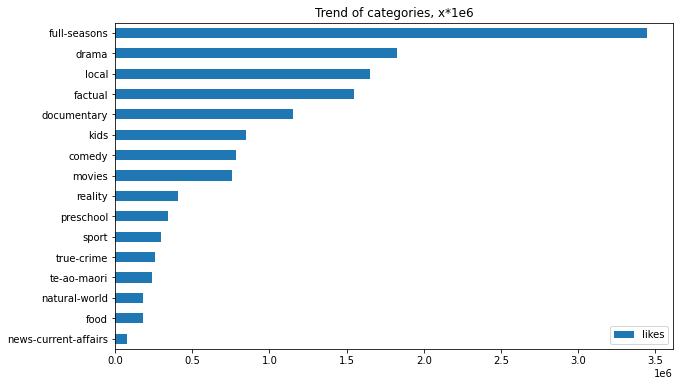

In [162]:
df_trend_likes.plot.barh(
    figsize=(10,6),
    title='Trend of categories, x*1e6'
);

Plot likes of a user id

In [164]:
categories_likes = {}
user_id = 100

tv_programs = df_user_likes.loc[user_id, df_user_likes.iloc[user_id] == 1].index
categories = df_tv_programs[df_tv_programs.tv_program_id.isin(tv_programs) & (df_tv_programs.is_season == 0)]['category']

for category in categories:
    if category in categories_likes:
        categories_likes[category] = categories_likes[category] + 1
    else:
        categories_likes[category] = 1

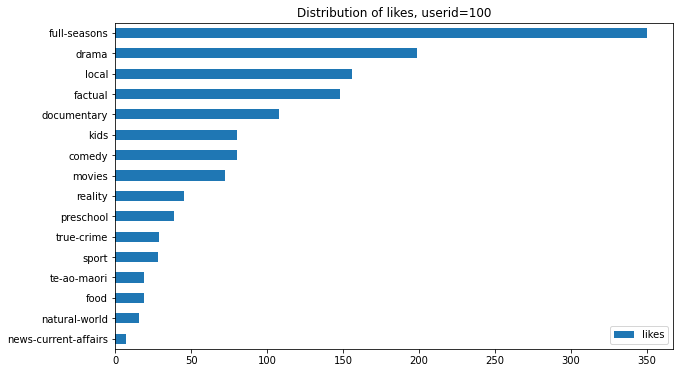

In [165]:
pd.DataFrame(categories_likes.values(), index=categories_likes.keys(), columns=['likes']).sort_values(by='likes').plot.barh(
    figsize=(10,6),
    title=f'Distribution of likes, userid={user_id}'
);

Create Cosine Similarity, higher the more similar

In [14]:
df_likes = pd.read_csv('../data/user_x_tvprogram_likes.csv')
matrix = df_likes.to_numpy()

In [21]:
%%time

from tqdm import tqdm

to_store = []
L = matrix.shape[-1]

for item_a in tqdm(range(L)):
    item_aa = [matrix[:, item_a]]

    for item_b in range(L):
        if item_a == item_b:
            continue

        item_bb = [matrix[:, item_b]]

        cosine_sim = cosine_similarity(item_aa, item_bb)[0][0]

        to_store.append({
            'tv_show_idx': item_a,
            'tv_show_idy': item_b,
            'score': cosine_sim
        })

100%|██████████| 2796/2796 [21:33<00:00,  2.16it/s]

CPU times: user 13min 27s, sys: 8min 4s, total: 21min 32s
Wall time: 21min 33s


In [26]:
pd.DataFrame(to_store).to_csv('../data/recommendation_cosine_similarity.csv', index=False)